In [4]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'movies.csv')

In [5]:

# Preview the table
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [14]:
# Find missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2}%'.format(col, pct_missing))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.00026%
score - 0.00039%
votes - 0.00039%
director - 0.0%
writer - 0.00039%
star - 0.00013%
country - 0.00039%
budget - 0.28%
gross - 0.025%
company - 0.0022%
runtime - 0.00052%


In [15]:
# Data cleaning - Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
#There are enough data to drop all missing data's rows
df = df.dropna() or #drop_duplicates()

In [20]:
#Check for missing data again, Now its good!

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [21]:
#Change data type of columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [22]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [72]:
pd.set_option('display.max_rows', 20)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,527,5,0,2009,688,7.8,1100000.0,1137,1756,2283,55,237000000,2847246203,2208,162.0,10
7445,529,5,0,2019,180,8.4,903000.0,160,729,2192,55,356000000,2797501328,1571,181.0,8
3045,6811,5,6,1997,696,7.8,1100000.0,1137,1756,1560,55,200000000,2201647264,2208,194.0,10
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,10
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,8


In [43]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [ ]:
#Hypothesis to study

# Budget may have high correlation
# Company may have high correlation

Text(0, 0.5, 'Gross Revenues')

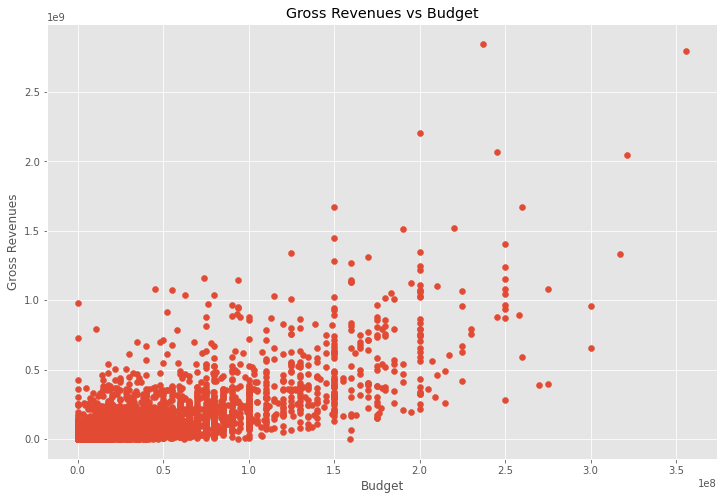

In [45]:
# Scatter plot with gross vs budget revenue 

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Gross Revenues vs Budget')
plt.xlabel('Budget')
plt.ylabel('Gross Revenues')

<AxesSubplot:xlabel='budget', ylabel='gross'>

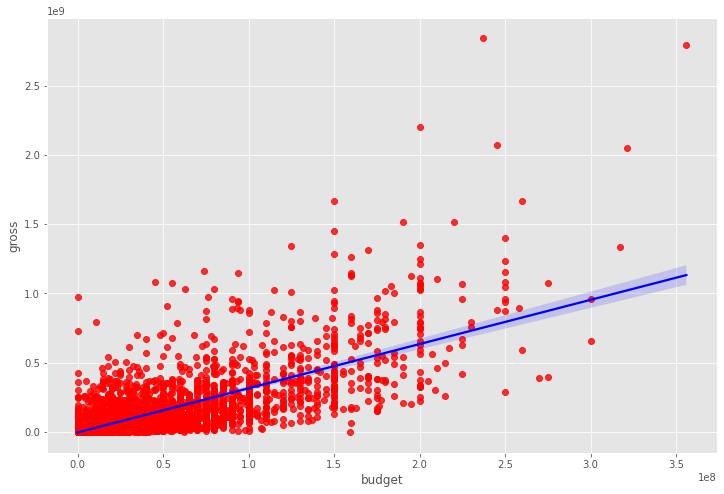

In [48]:
#Plot budget vs gross using Seaborn


sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [54]:
# Analyze correlation

df.corr(method = 'pearson') # Pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.314842,0.264716,0.120676
score,0.102346,1.000000,0.411931,0.056781,0.188259,0.400574
votes,0.226895,0.411931,1.000000,0.485301,0.632987,0.309366
budget,0.314842,0.056781,0.485301,1.000000,0.750562,0.270042
gross,0.264716,0.188259,0.632987,0.750562,1.000000,0.244942
runtime,0.120676,0.400574,0.309366,0.270042,0.244942,1.000000


In [ ]:
# High correlation between budget and gross revenues have been observed as hypothesized

Text(87.0, 0.5, 'Movie Features')

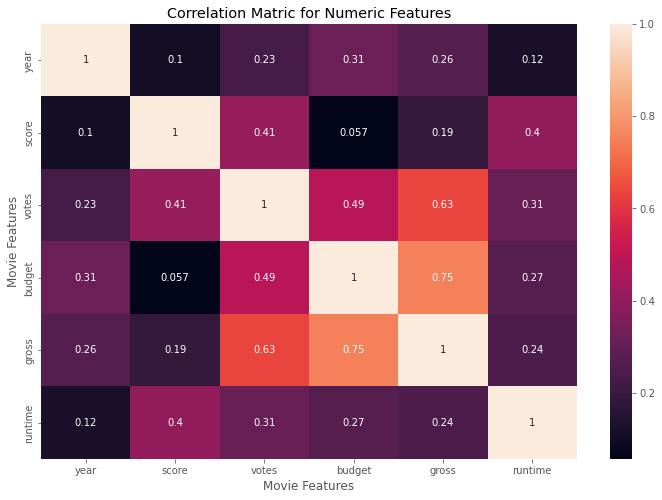

In [60]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [ ]:
# Hypothesis 2, Company may have high correlation of gross revenues

In [61]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


In [64]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
                                                               
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,527,5,0,2009,688,7.8,1100000.0,1137,1756,2283,55,237000000,2847246203,2208,162.0,10
7445,529,5,0,2019,180,8.4,903000.0,160,729,2192,55,356000000,2797501328,1571,181.0,8
3045,6811,5,6,1997,696,7.8,1100000.0,1137,1756,1560,55,200000000,2201647264,2208,194.0,10
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,10
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,4748,6,4,1991,2702,5.6,2200.0,1889,119,1545,17,0,0,1145,99.0,17
5033,3331,3,6,2006,2365,6.3,12000.0,1538,2367,767,55,1000000,0,384,77.0,16
27,4380,4,0,1980,277,5.0,4100.0,1262,33,1113,54,36000000,0,1273,115.0,9
1842,472,3,4,1990,3074,6.5,1300.0,1013,2053,1819,6,0,0,665,90.0,19


Text(87.0, 0.5, 'Movie Features')

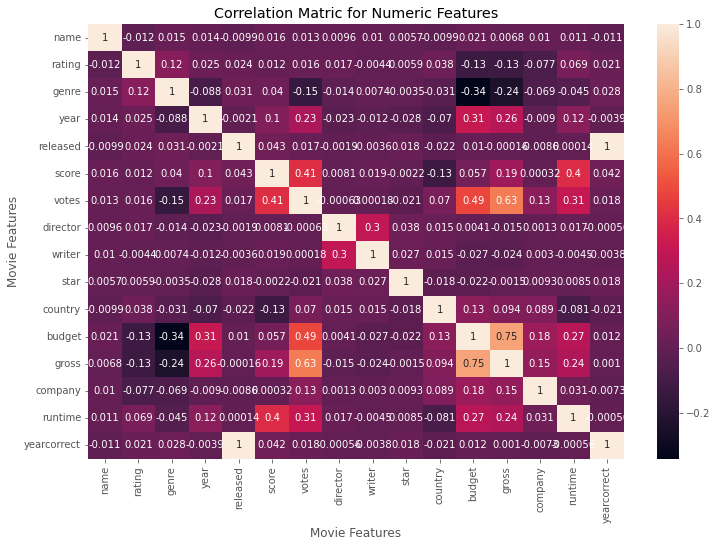

In [65]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [66]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.011924,0.015300,0.013514,-0.009906,0.016181,0.013180,0.009608,0.010217,0.005685,-0.009939,0.020825,0.006817,0.010073,0.011151,-0.011091
rating,-0.011924,1.000000,0.117566,0.024989,0.024319,0.011538,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.126806,-0.128910,-0.076807,0.069089,0.021170
genre,0.015300,0.117566,1.000000,-0.088172,0.030625,0.040090,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.342064,-0.240903,-0.068678,-0.044631,0.028490
year,0.013514,0.024989,-0.088172,1.000000,-0.002088,0.102346,0.226895,-0.022765,-0.012318,-0.027691,-0.070266,0.314842,0.264716,-0.009026,0.120676,-0.003922
released,-0.009906,0.024319,0.030625,-0.002088,1.000000,0.043175,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.009995,-0.000164,-0.008570,0.000145,0.995376
score,0.016181,0.011538,0.040090,0.102346,0.043175,1.000000,0.411931,0.008071,0.019084,-0.002193,-0.130094,0.056781,0.188259,0.000316,0.400574,0.041866
votes,0.013180,0.016086,-0.148420,0.226895,0.016877,0.411931,1.000000,-0.000627,0.000177,-0.020977,0.069582,0.485301,0.632987,0.129596,0.309366,0.017834
director,0.009608,0.017205,-0.013508,-0.022765,-0.001868,0.008071,-0.000627,1.000000,0.297479,0.037570,0.015245,0.004140,-0.015027,0.001337,0.017386,-0.000558
writer,0.010217,-0.004387,0.007351,-0.012318,-0.003569,0.019084,0.000177,0.297479,1.000000,0.026584,0.014937,-0.027145,-0.023834,0.003035,-0.004526,-0.003791
star,0.005685,0.005905,-0.003525,-0.027691,0.018026,-0.002193,-0.020977,0.037570,0.026584,1.000000,-0.017626,-0.021930,-0.001470,0.009317,0.008474,0.017934


In [73]:
# Organize to see the highest correlation

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.011924
      genre       0.015300
      year        0.013514
      released   -0.009906
dtype: float64

In [74]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.342064
budget  genre    -0.342064
genre   gross    -0.240903
gross   genre    -0.240903
genre   votes    -0.148420
dtype: float64

In [75]:
#Yearcorrect & Released can be ignored. It should be 100% correlated...

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr.head()

gross        votes       0.632987
votes        gross       0.632987
gross        budget      0.750562
budget       gross       0.750562
yearcorrect  released    0.995376
dtype: float64

In [ ]:
# Findings: Votes and budget have the highest correlation to gross revenues!

# Hypothesis:
# Budget has the highest correlation to gross revenues
# Company has low correlation to gross revenues